<h1><b>DATA AND LIBRARIES IMPORT</b></h1>

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [332]:
taxi_data_jan24 = pd.read_csv("data/yellow_tripdata.csv",low_memory = False)
taxi_data = pd.concat([taxi_data_jan24])
print(taxi_data.shape)
taxi_data.head()

(2964624, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


<h1><b>DATA EXPLORATION</b></h1>

In [333]:
print(taxi_data.columns)
taxi_data.isnull().sum()


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')


VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
RatecodeID               140162
store_and_fwd_flag       140162
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
Airport_fee              140162
dtype: int64

In [334]:
taxi_data[taxi_data['passenger_count'].isnull()]['payment_type'].head()

2824462    0
2824463    0
2824464    0
2824465    0
2824466    0
Name: payment_type, dtype: int64

In [335]:
taxi_data[taxi_data['passenger_count'] == 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
7,1,2024-01-01 00:30:40,2024-01-01 00:58:40,0.0,3.0,1.0,N,246,231,2,25.4,3.50,0.5,0.00,0.00,1.0,30.40,2.5,0.00
261,1,2024-01-01 00:49:42,2024-01-01 00:58:21,0.0,2.9,1.0,N,87,79,1,14.9,3.50,0.5,5.00,0.00,1.0,24.90,2.5,0.00
325,1,2024-01-01 00:42:26,2024-01-01 01:12:01,0.0,16.6,2.0,N,132,233,1,70.0,4.25,0.5,16.53,6.94,1.0,99.22,2.5,1.75
343,1,2024-01-01 00:38:18,2024-01-01 01:01:12,0.0,2.5,1.0,N,90,229,1,17.0,3.50,0.5,5.50,0.00,1.0,27.50,2.5,0.00
446,1,2024-01-01 00:26:21,2024-01-01 00:38:03,0.0,3.4,1.0,N,137,263,1,15.6,3.50,0.5,2.06,0.00,1.0,22.66,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824130,1,2024-01-31 23:05:42,2024-01-31 23:10:12,0.0,1.1,1.0,Y,161,107,1,7.2,3.50,0.5,2.40,0.00,1.0,14.60,2.5,0.00
2824207,1,2024-01-31 23:37:43,2024-01-31 23:45:33,0.0,0.9,1.0,N,170,186,1,9.3,3.50,0.5,2.00,0.00,1.0,16.30,2.5,0.00
2824208,1,2024-01-31 23:51:19,2024-02-01 00:21:03,0.0,4.8,1.0,N,68,226,1,31.0,3.50,0.5,7.20,0.00,1.0,43.20,2.5,0.00
2824369,1,2024-01-31 23:00:39,2024-01-31 23:17:20,0.0,2.4,1.0,N,230,107,1,16.3,3.50,0.5,4.25,0.00,1.0,25.55,2.5,0.00


In [336]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID','payment_type',  'total_amount']]
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


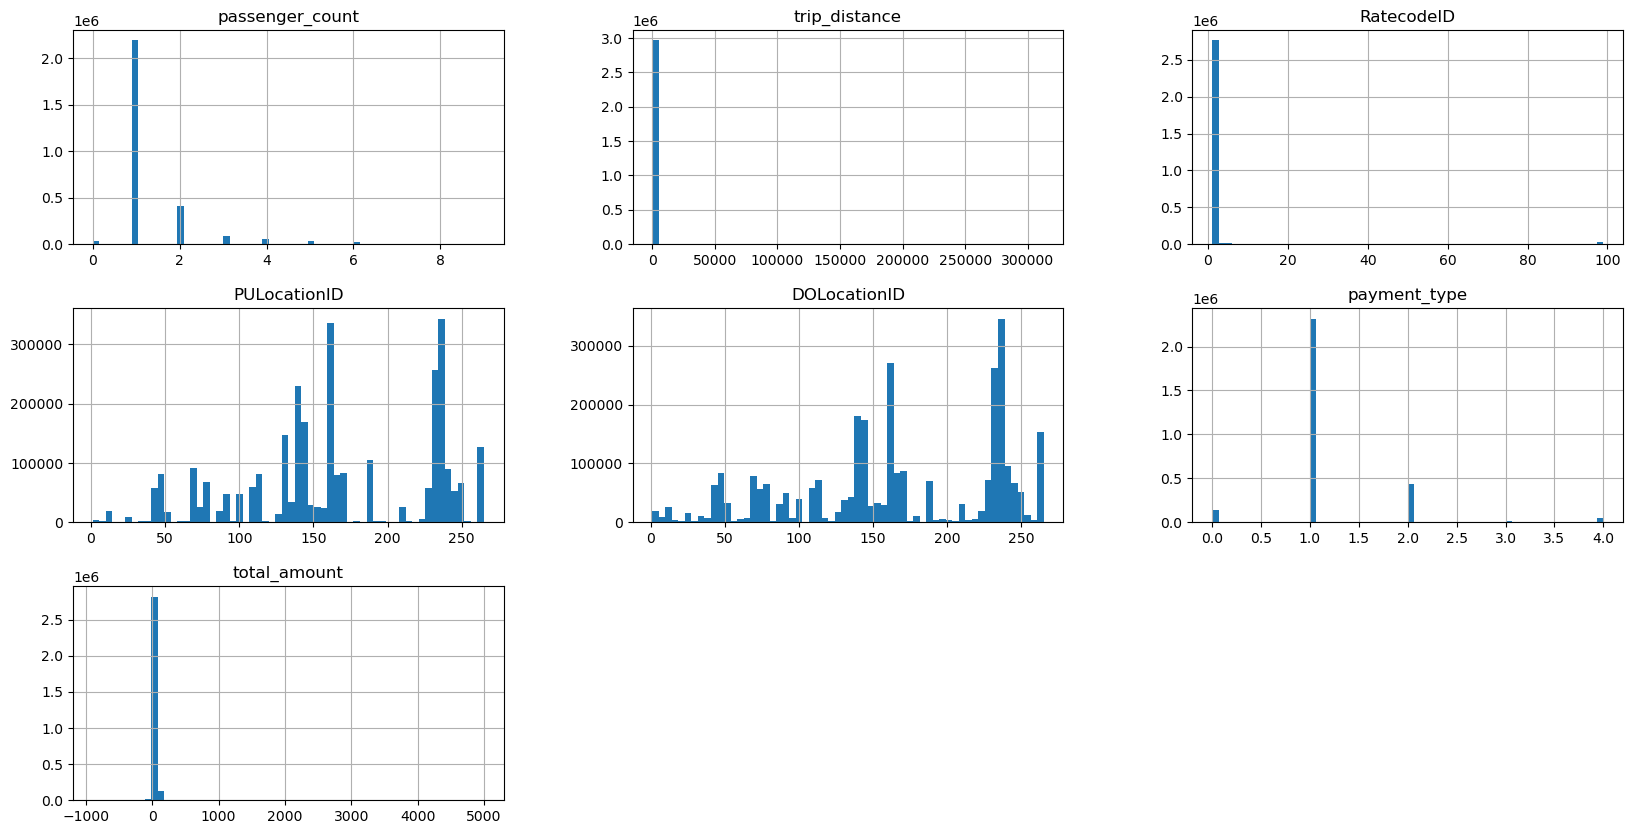

In [337]:
_ = taxi_data.hist(figsize = (20, 10), bins = 60)
plt.show()

In [338]:
taxi_data['passenger_count'].value_counts()

passenger_count
1.0    2188739
2.0     405103
3.0      91262
4.0      51974
5.0      33506
0.0      31465
6.0      22353
8.0         51
7.0          8
9.0          1
Name: count, dtype: int64

In [339]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     2663350
2.0       98713
99.0      28663
5.0       19410
3.0        7954
4.0        6365
6.0           7
Name: count, dtype: int64

In [340]:
taxi_data['payment_type'].value_counts()

payment_type
1    2319046
2     439191
0     140162
4      46628
3      19597
Name: count, dtype: int64

In [341]:
taxi_data['trip_distance'].value_counts()

trip_distance
0.00        60371
0.90        40455
1.00        40192
0.80        39964
1.10        38662
            ...  
33.33           1
40.17           1
47.48           1
47.95           1
21235.88        1
Name: count, Length: 4489, dtype: int64

In [342]:
taxi_data['total_amount'].value_counts()

total_amount
16.80     45432
12.60     43275
21.00     36556
15.12     26687
15.96     26396
          ...  
584.18        1
323.28        1
201.93        1
128.09        1
118.96        1
Name: count, Length: 19241, dtype: int64

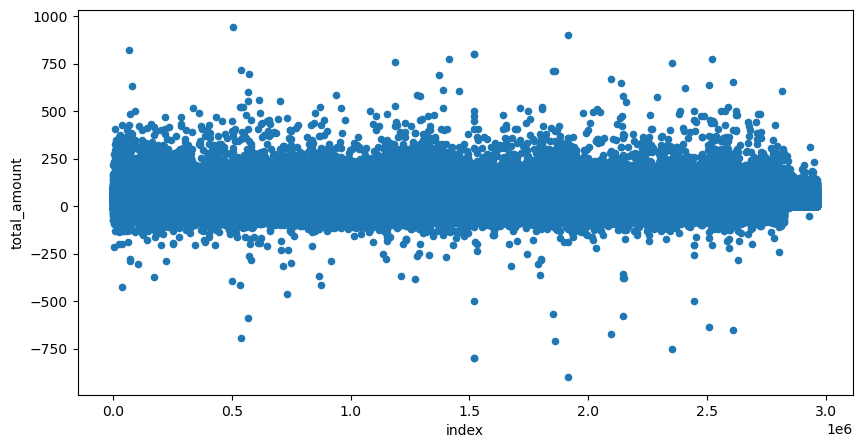

In [343]:
_ = taxi_data[taxi_data['total_amount'] < 1000].reset_index().plot(kind='scatter', y ='total_amount', x='index', figsize=(10, 5))
plt.show()

In [344]:
taxi_data[taxi_data['total_amount'] < 0].shape

(35504, 9)

In [345]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
4    21406
2     8326
3     5741
1       29
0        2
Name: count, dtype: int64

In [346]:
taxi_data[taxi_data['total_amount'] > 200].shape

(2005, 9)

Cutting the range of the total amounts by setting upper limit to $200

In [348]:
print((taxi_data[taxi_data['total_amount'] < 0]['trip_distance'] == 0.0).value_counts())
print((taxi_data[taxi_data['total_amount'] > 0]['trip_distance'] == 0.0).value_counts())
(taxi_data[taxi_data['total_amount'] == 0]['trip_distance'] == 0.0).value_counts()

trip_distance
False    32103
True      3401
Name: count, dtype: int64
trip_distance
False    2872021
True       56683
Name: count, dtype: int64


trip_distance
True     287
False    129
Name: count, dtype: int64

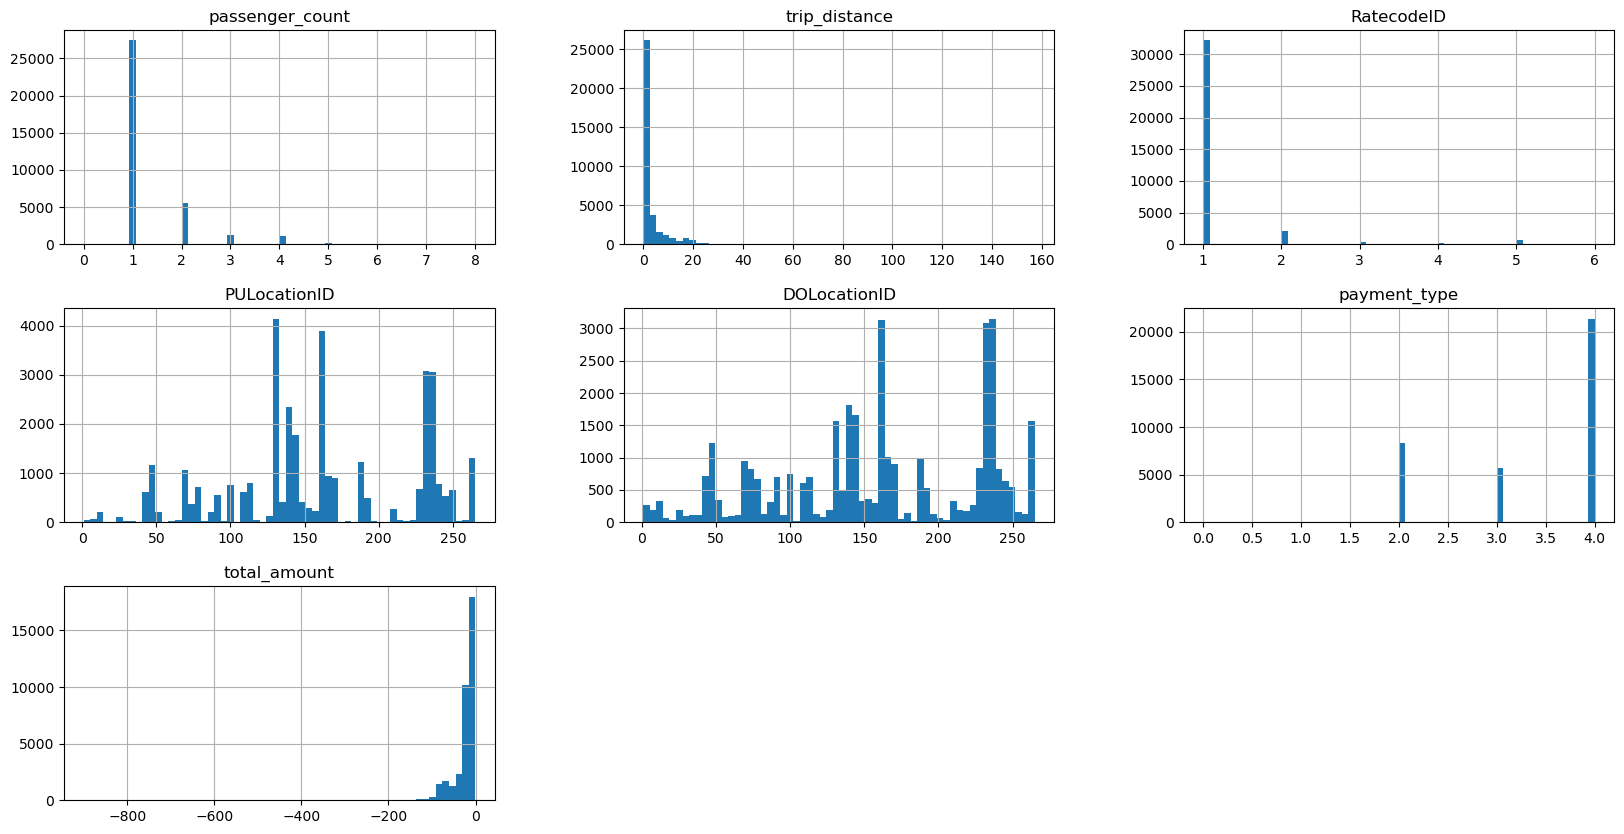

In [349]:
_ = taxi_data[taxi_data['total_amount']<0].hist(figsize=(20,10), bins = 60)
plt.show()

In [350]:
print(taxi_data[taxi_data['total_amount']<=0].shape)
print(taxi_data[taxi_data['trip_distance']==0].shape)

(35920, 9)
(60371, 9)


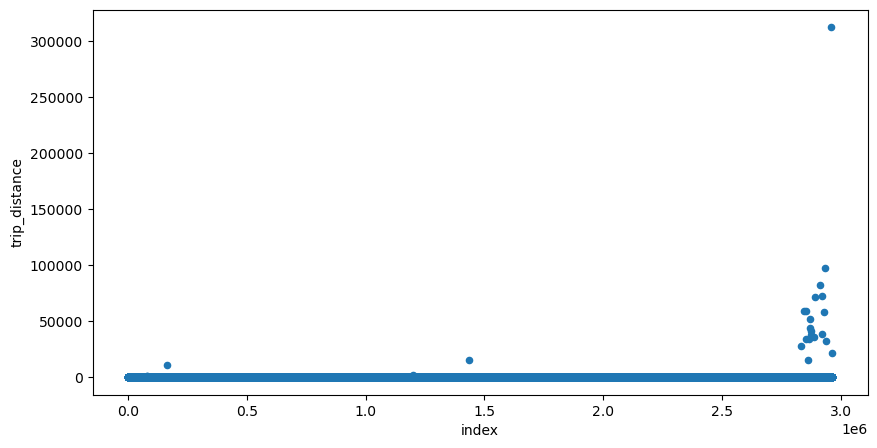

In [351]:
_ = taxi_data.reset_index().plot(kind='scatter', y ='trip_distance', x='index', figsize=(10, 5))
plt.show()

* Fix Null values
* Convert Negative entries of 'total amount' to Positive
* Cut of at $200
* Remove 0 valued distances
* Convert 0 values passenger_count to 1

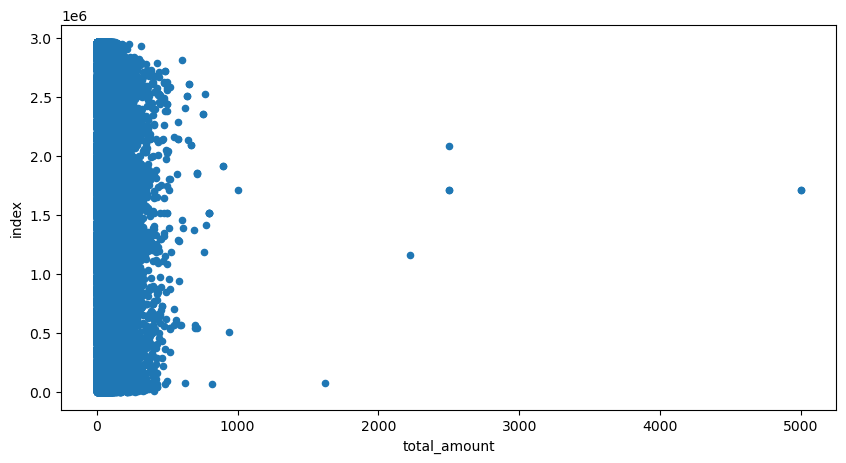

In [353]:
taxi_data['total_amount'] = taxi_data['total_amount'].abs()
(taxi_data['total_amount'] >= 0).value_counts()
_ = taxi_data['total_amount'].reset_index().plot(kind='scatter', x = 'total_amount', y='index', figsize = (10,5))
plt.show()

<h1><b>DATA CLEANING</b></h1>

(2962539, 9)


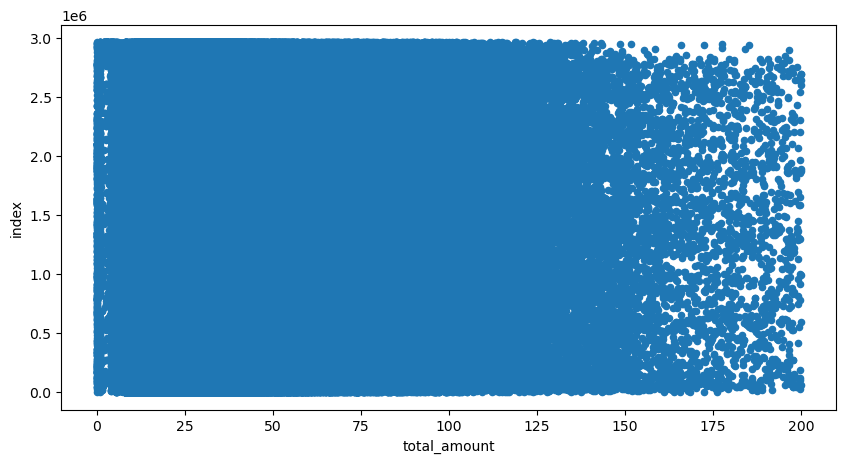

In [380]:
taxi_data_filtered = taxi_data[taxi_data['total_amount'] < 200.0]
print(taxi_data_filtered.shape)
_ = taxi_data_filtered['total_amount'].reset_index().plot(kind='scatter', x = 'total_amount', y='index', figsize = (10,5))
plt.show()

In [407]:
taxi_data_filtered[taxi_data_filtered['trip_distance'] > 50].shape

(54, 9)

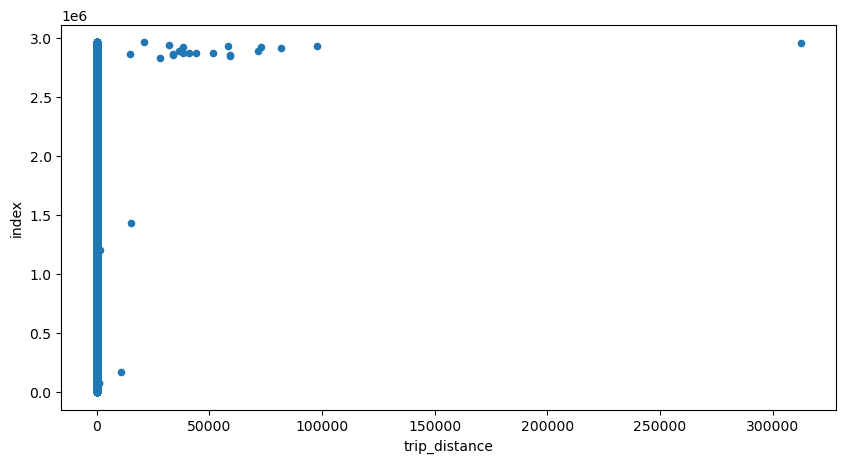

In [385]:
_ = taxi_data_filtered['trip_distance'].reset_index().plot(kind='scatter',  x = 'trip_distance', y ='index', figsize = (10,5))
plt.show()

In [495]:
taxi_data_filtered = taxi_data_filtered[taxi_data_filtered['trip_distance'] < 50]
taxi_data_filtered.shape

(2962485, 9)

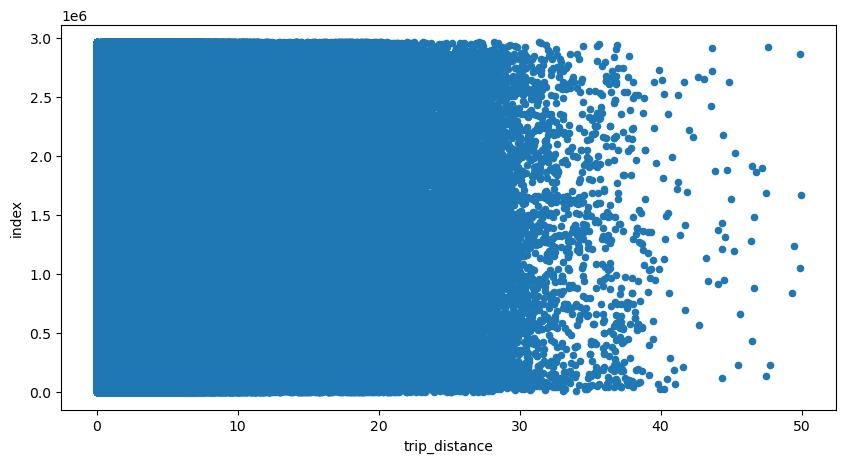

In [415]:
_ = taxi_data_filtered['trip_distance'].reset_index().plot(kind='scatter',  x = 'trip_distance', y ='index', figsize = (10,5))
plt.show()

In [417]:
taxi_data_filtered.isnull().sum()

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140134
trip_distance                 0
RatecodeID               140134
PULocationID                  0
DOLocationID                  0
payment_type                  0
total_amount                  0
dtype: int64

In [423]:
taxi_data_filtered[taxi_data_filtered['RatecodeID'] == 99].value_counts()

tpep_pickup_datetime  tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  total_amount
2024-01-01 00:13:45   2024-01-01 00:22:08    1.0              0.0            99.0        263           140           1             19.00           1
2024-01-22 17:19:41   2024-01-22 18:21:49    1.0              7.1            99.0        65            39            1             32.00           1
2024-01-22 17:28:11   2024-01-22 17:34:54    1.0              0.4            99.0        65            65            1             17.00           1
2024-01-22 17:26:06   2024-01-22 17:48:49    1.0              2.6            99.0        76            177           1             22.00           1
2024-01-22 17:25:25   2024-01-22 18:00:05    1.0              5.9            99.0        50            42            1             27.00           1
                                                                                                               

In [441]:
taxi_data_filtered['passenger_count'] = taxi_data_filtered['passenger_count'].fillna(1)
taxi_data_filtered['RatecodeID'] = taxi_data_filtered['RatecodeID'].fillna(1)
taxi_data_filtered['RatecodeID'] = taxi_data_filtered['RatecodeID'].replace(99, 1)
taxi_data_filtered[taxi_data_filtered['trip_distance'] == 0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
17,2024-01-01 00:52:09,2024-01-01 00:52:28,1.0,0.0,1.0,237,237,2,8.0
23,2024-01-01 00:14:29,2024-01-01 00:14:29,1.0,0.0,1.0,236,264,2,8.0
111,2024-01-01 00:58:50,2024-01-01 01:01:10,1.0,0.0,1.0,162,162,1,11.4
198,2024-01-01 00:15:16,2024-01-01 00:26:58,2.0,0.0,1.0,79,264,1,18.8
199,2024-01-01 00:39:34,2024-01-01 01:04:02,1.0,0.0,1.0,161,264,1,26.8


Filling null values in trip distances with the mean value of the feature.

In [461]:
mean_distance = taxi_data.loc[taxi_data['trip_distance'] > 0, 'trip_distance'].mean()
taxi_data_filtered.loc[(taxi_data_filtered['trip_distance'] == 0), 'trip_distance'] = mean_distance
taxi_data_filtered[taxi_data_filtered['trip_distance'] <= 0].shape

(0, 9)

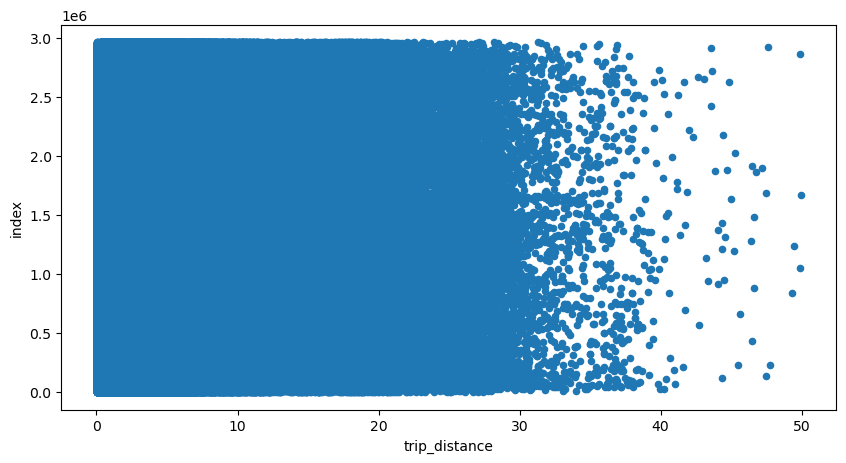

In [455]:
_ = taxi_data_filtered['trip_distance'].reset_index().plot(kind='scatter',  x = 'trip_distance', y ='index', figsize = (10,5))
plt.show()

<h1><b>DATA PREPARATION</b></h1>

In [501]:
taxi_data_prepared = taxi_data_filtered.copy()
taxi_data_prepared.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [505]:
taxi_data_prepared.loc[:, 'RatecodeID'] = taxi_data_prepared.loc[:, 'RatecodeID'].astype(str)
taxi_data_prepared.loc[:, 'PULocationID'] = taxi_data_prepared.loc[:, 'PULocationID'].astype(str)
taxi_data_prepared.loc[:, 'DOLocationID'] = taxi_data_prepared.loc[:, 'DOLocationID'].astype(str)
taxi_data_prepared.loc[:, 'payment_type'] = taxi_data_prepared.loc[:, 'payment_type'].astype(str)

taxi_data_prepared.loc[:, 'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_pickup_datetime'])
taxi_data_prepared.loc[:, 'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_dropoff_datetime'])

changing categorical features to string type to prevent hierarchial inference by model

In [511]:
taxi_data_prepared.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                object
PULocationID              object
DOLocationID              object
payment_type              object
total_amount             float64
dtype: object